In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates

import requests
import json
from pathlib import Path
import sys
import pickle

import time
from datetime import datetime
import datetime

#from sklearn.model_selection import 
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV
#from sklearn.model_selection import 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
#from sklearn.model_selection import 
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint

from IPython.display import Image
import graphviz

%matplotlib inline

## Function to convert day number to day

In [2]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [3]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [4]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info_final.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info_final.csv')

In [5]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

In [6]:
df.shape,dfw.shape

((821117, 11), (1678, 13))

In [7]:
df['status'].unique()

array(['OPEN'], dtype=object)

In [8]:
df.describe()

,number,bike_stand,bike_stand_available,bike_available,delete_flag
count,821117.000000,821117.000000,821117.000000,821117.000000,821117.0
mean,60.117590,31.893069,19.795916,11.743927,0.0
std,41.693403,7.629862,11.061139,9.627312,0.0
min,1.000000,1.000000,0.000000,0.000000,0.0
25%,29.000000,29.000000,11.000000,4.000000,0.0
50%,59.000000,30.000000,20.000000,10.000000,0.0
75%,89.000000,40.000000,28.000000,18.000000,0.0
max,507.000000,40.000000,40.000000,40.000000,0.0


In [9]:
df.dtypes

id                      object
number                   int64
name                    object
address                 object
bike_stand               int64
bike_stand_available     int64
bike_available           int64
status                  object
last_update             object
creat_time              object
delete_flag              int64
dtype: object

In [10]:
#dfw.shape

In [11]:
#dfw.describe()

In [12]:
#dfw.dtypes

In [13]:
#dfw.head(5)

In [14]:
#dfw['weather_main'].unique()

In [15]:
df.head(5)

,id,number,name,address,bike_stand,bike_stand_available,bike_available,status,last_update,creat_time,delete_flag
0,00003a0978d64fb0,5,CHARLEMONT PLACE,Charlemont Street,40,35,5,OPEN,2023-03-22 17:07:52,2023-03-22 17:09:30,0
1,00003d7ece87406b,55,HATCH STREET,Hatch Street,36,26,8,OPEN,2023-03-23 17:06:28,2023-03-23 17:06:59,0
2,000059ab036a48f3,76,MARKET STREET SOUTH,Market Street South,38,30,8,OPEN,2023-03-11 09:47:27,2023-03-11 09:49:12,0
3,000088f148a64088,108,AVONDALE ROAD,Avondale Road,35,18,17,OPEN,2023-03-26 02:04:50,2023-03-26 02:10:38,0
4,000095e7fbc148ab,113,MERRION SQUARE SOUTH,Merrion Square South,40,21,19,OPEN,2023-03-14 14:38:00,2023-03-14 14:48:35,0


## Set up Time Parmeters - Bike and Weather

In [16]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%Y-%m-%d %H:%M:%S')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df["DAY"] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

In [17]:
df.dtypes

id                              object
number                           int64
name                            object
address                         object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
status                          object
last_update                     object
creat_time                      object
delete_flag                      int64
TIME                    datetime64[ns]
YEAR                             int64
MONTH                            int64
DAY                              int64
DAY_num                          int64
HOUR                             int64
MINUTE                           int64
dtype: object

In [18]:
df['DAY'].unique()

array([2, 3, 5, 6, 1, 0, 4], dtype=int64)

In [19]:
df["TIME"].head()

0   2023-03-22 17:09:30
1   2023-03-23 17:06:59
2   2023-03-11 09:49:12
3   2023-03-26 02:10:38
4   2023-03-14 14:48:35
Name: TIME, dtype: datetime64[ns]

In [20]:
df['TIME'] = df['TIME'].dt.round('H')

In [21]:
df['TIME'].head()

0   2023-03-22 17:00:00
1   2023-03-23 17:00:00
2   2023-03-11 10:00:00
3   2023-03-26 02:00:00
4   2023-03-14 15:00:00
Name: TIME, dtype: datetime64[ns]

In [22]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%Y-%m-%d %H:%M:%S')
dfw["sunrise"] = pd.to_datetime(dfw["sunrise"],format='%Y-%m-%d %H:%M:%S')
dfw["sunset"] = pd.to_datetime(dfw["sunset"],format='%Y-%m-%d %H:%M:%S')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['DAY'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['DAY'],np.int64) 
dfw['DAY'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

In [23]:
dfw['TIME'] = dfw['TIME'].dt.round('H')
dfw['TIME'] .head()

0   2023-03-13 09:00:00
1   2023-03-28 10:00:00
2   2023-03-31 01:00:00
3   2023-03-15 06:00:00
4   2023-03-31 01:00:00
Name: TIME, dtype: datetime64[ns]

In [24]:
df.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
df.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
df.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
df.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
df.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
df.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
df.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
df["DAY_name"].unique()

array(['Wed', 'Thu', 'Sat', 'Sun', 'Tue', 'Mon', 'Fri'], dtype=object)

In [25]:
dfw.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
dfw.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
dfw.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
dfw.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
dfw.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
dfw.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
dfw.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
dfw["DAY_name"].unique()

array(['Wed', 'Thu', 'Sat', 'Sun', 'Tue', 'Mon', 'Fri'], dtype=object)

## Create New Bike parameters 

In [26]:
df['utilisation'] = df['bike_stand_available'] / df['bike_stand']
df['utilisation'].head()

0    0.875000
1    0.722222
2    0.789474
3    0.514286
4    0.525000
Name: utilisation, dtype: float64

## Set up Search Parameters for Bike (Station ID, Day) 

OK


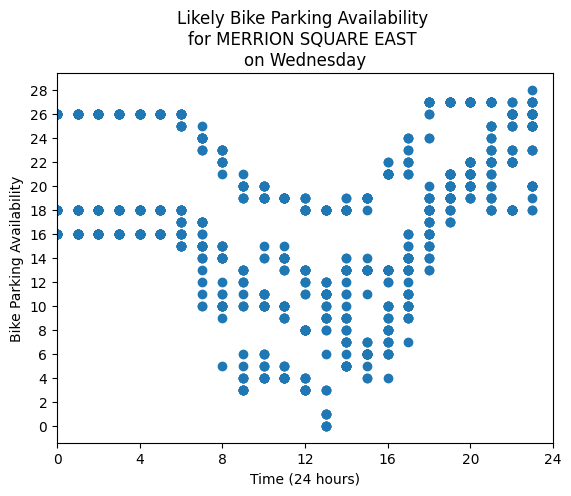

In [65]:
#Check Bike availability or Bike Parking Availability
req = 'p' #input("Do you want to check for Bike Availability (Type: b) or Parking Availability (Type: p): ")
if req == 'b' or req == 'B' or req == 'p' or req == 'P' or req == 'bike' or req == 'Bike' or req == 'park' or req == 'Park':

    #Month
    month_num = 3

    #Day of the week
    day_num = 4 #int(input("Enter Day Number (1 = Mon, 2 = Tues, 3 = Wed etc): "))
    
    #Hour
    hour_num = 12
    
    #Minute pass the hour
    #min_num = int(input("Enter Minute pass the hour (0 - 15 - 30 - 45): "))
    
    #Station ID
    stationid = 25 #int(input("Enter Station ID (1 to 117): "))

    try:
        stationname = df.loc[(df['number']==stationid),'name'].values[0]
        
        #Filter data based on certain input parameters
        df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['DAY']==day_num-1) & (df['number']==stationid)
        
        ## Set up x- and y-axis of Plot
        x =df['HOUR'].loc[df['station_select']]

        if req == 'bike' or req == 'Bike' or req == 'b' or req == 'B':
            y = df['bike_available'].loc[df['station_select']]
            plt.ylabel("Bike Availability")
            plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            
        elif req == 'park' or req == 'Park' or req == 'p' or req == 'P':
            y = df['bike_stand_available'].loc[df['station_select']]
            plt.ylabel("Bike Parking Availability")
            plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            print("OK")
       
        #Set Up Plot
        plt.xlabel("Time (24 hours)")
        ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
        xtick = np.array([0,4,8,12,16,20,24])
        plt.xticks(xtick)
        plt.yticks(ytick)
        plt.xlim(0,24)
        plt.scatter(x,y)
        plt.show()
    except:
        print ("Station ID Does not exist")
    
else:
    print("Incorrect Entry")

## Examine Weather Information

In [28]:
#Convert from Kelvin to Celcsius
dfw["temp"] = dfw["temp"]-273.15
dfw["temp_feel"] = dfw["temp_feel"]-273.15

#dfw["wind_speed"].unique()
dfw["weather_main"].unique()

array(['Clouds', 'Rain', 'Drizzle', 'Snow', 'Clear', 'Mist', 'Fog'],
      dtype=object)

In [29]:
dfw['temp_check'] = (dfw['temp']==0)
dfw["temp"].loc[dfw['temp_check']]

Series([], Name: temp, dtype: float64)

## Create new column putting numerical values to weather_main

In [30]:
dfw['weather_main'].replace(['Clouds', 'Rain','Snow','Clear','Drizzle','Mist','Fog'],[2, 4,5,1,3,6,7], inplace=True)
dfw["weather_main"].unique()

array([2, 4, 3, 5, 1, 6, 7], dtype=int64)

In [31]:
dfw['time_select'] = (dfw['DAY']==day_num-1) & (dfw['MONTH']==month_num) #& (dfw["HOUR_w"] == hour_num)

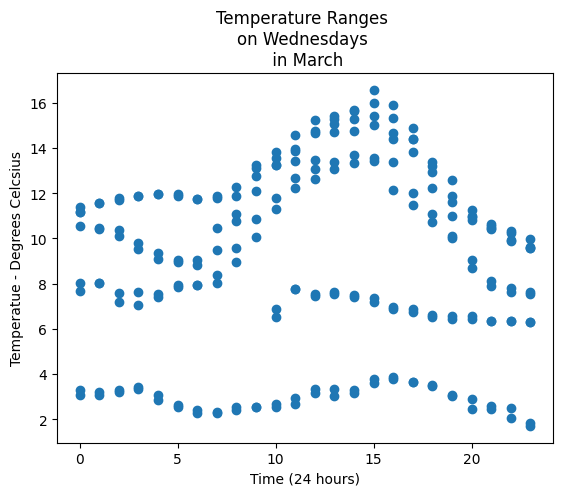

In [61]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["temp"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Temperature Ranges \non {convert_day(day_num-1)}s \n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Temperatue - Degrees Celcsius")
#ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
#xtick = np.array([0,4,8,12,16,20,24])
#plt.xticks(xtick)
#plt.yticks(ytick)
plt.scatter(x,y)
plt.show()

In [33]:
y.unique()

array([10.45, 12.25,  3.19,  9.88,  6.36,  2.45, 10.08,  2.61, 13.25,
        6.61, 16.57, 10.36, 11.7 ,  3.47, 15.43, 10.77,  7.83,  6.86,
       13.49, 11.17,  1.71,  7.92, 12.01,  3.28, 11.4 , 13.89,  7.5 ,
       10.09,  2.27,  2.53, 10.86, 13.41, 10.35,  2.06,  7.18, 13.12,
        6.33, 10.  ,  7.77,  9.8 , 15.9 ,  6.74,  8.81, 12.11, 10.43,
       11.8 ,  6.34, 10.48, 11.86,  6.58,  3.17,  2.87, 13.37,  8.05,
       10.26,  2.51, 11.76,  3.66,  8.04,  8.38, 12.64, 11.55,  7.56,
        9.56,  6.87, 15.25, 11.97,  3.79,  7.94, 13.68,  2.4 , 13.08,
        9.03,  2.32, 13.35,  2.63, 14.56,  3.29,  2.55, 11.  ,  7.69,
        8.1 ,  9.52, 15.66,  3.2 , 12.28,  6.44,  9.92, 13.06, 14.87,
        9.07,  7.87,  7.46, 15.27,  9.59, 12.77,  2.7 , 10.46, 11.26,
       14.39,  3.08, 13.83, 13.44,  7.39,  1.86,  2.26, 13.81,  8.96,
        3.44, 10.55, 15.02, 13.96, 11.87,  9.63,  9.11,  3.87, 10.1 ,
        3.34,  7.62, 12.13,  6.54, 11.57,  3.59, 15.06, 14.74,  3.53,
       13.4 ,  9.36,

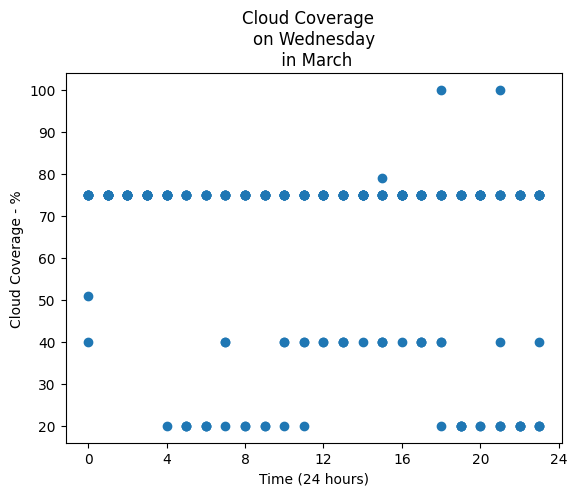

In [62]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["clouds"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Cloud Coverage  \non {convert_day(day_num-1)}\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Cloud Coverage - %")
ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y)
plt.show()

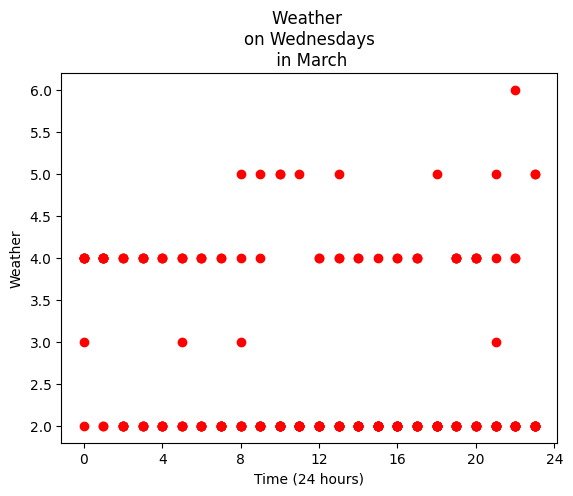

In [35]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["weather_main"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Weather \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Weather")
#ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y,color='red')
plt.show()

## Combine the two dataframes

In [36]:
df.shape,dfw.shape

((821117, 21), (1678, 23))

In [66]:
dfbikeweath = pd.merge(df, dfw, on='TIME', how='inner')

#dfbikeweath = df.merge(dfw, on="TIME")
dfbikeweath.shape

(1640866, 43)

In [67]:
dfw["TIME"].isin(df["TIME"]).value_counts()

True     1203
False     475
Name: TIME, dtype: int64

In [68]:
dfbikeweath.columns

Index(['id_x', 'number', 'name', 'address', 'bike_stand',
       'bike_stand_available', 'bike_available', 'status', 'last_update',
       'creat_time_x', 'delete_flag_x', 'TIME', 'YEAR_x', 'MONTH_x', 'DAY_x',
       'DAY_num_x', 'HOUR_x', 'MINUTE_x', 'DAY_name_x', 'utilisation',
       'station_select', 'id_y', 'coord_lon', 'coord_lat', 'weather_id',
       'weather_main', 'temp', 'temp_feel', 'wind_speed', 'clouds', 'sunrise',
       'sunset', 'creat_time_y', 'delete_flag_y', 'YEAR_y', 'MONTH_y', 'DAY_y',
       'DAY_num_y', 'HOUR_y', 'MINUTE_y', 'DAY_name_y', 'temp_check',
       'time_select'],
      dtype='object')

In [69]:
list(dfbikeweath.columns[:7]) + ['weather_main','temp']

['id_x',
 'number',
 'name',
 'address',
 'bike_stand',
 'bike_stand_available',
 'bike_available',
 'weather_main',
 'temp']

In [70]:
dfbikeweath.head(10)[list(dfbikeweath.columns[:7]) + ['weather_main','temp']]

,id_x,number,name,address,bike_stand,bike_stand_available,bike_available,weather_main,temp
0,00003a0978d64fb0,5,CHARLEMONT PLACE,Charlemont Street,40,35,5,2,11.62
1,00003a0978d64fb0,5,CHARLEMONT PLACE,Charlemont Street,40,35,5,2,11.25
2,0014b63a121a4193,31,PARNELL STREET,Parnell Street,20,11,9,2,11.62
3,0014b63a121a4193,31,PARNELL STREET,Parnell Street,20,11,9,2,11.25
4,002fd7cc52824964,23,CUSTOM HOUSE,Custom House,30,7,23,2,11.62
5,002fd7cc52824964,23,CUSTOM HOUSE,Custom House,30,7,23,2,11.25
6,003dec99e0254373,10,DAME STREET,Dame Street,16,16,0,2,11.62
7,003dec99e0254373,10,DAME STREET,Dame Street,16,16,0,2,11.25
8,0045d06920584868,40,JERVIS STREET,Jervis Street,21,7,14,2,11.62
9,0045d06920584868,40,JERVIS STREET,Jervis Street,21,7,14,2,11.25


In [71]:
dfbikeweath.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1640866.0,60.118668,41.699117,1.0000,29.0000,59.000000,89.000000,507.0000
bike_stand,1640866.0,31.892994,7.630001,1.0000,29.0000,30.000000,40.000000,40.0000
bike_stand_available,1640866.0,19.795724,11.060572,0.0000,11.0000,20.000000,28.000000,40.0000
bike_available,1640866.0,11.743925,9.626861,0.0000,4.0000,10.000000,18.000000,40.0000
delete_flag_x,1640866.0,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.0000
YEAR_x,1640866.0,2023.000000,0.000000,2023.0000,2023.0000,2023.000000,2023.000000,2023.0000
MONTH_x,1640866.0,3.000000,0.000000,3.0000,3.0000,3.000000,3.000000,3.0000
DAY_x,1640866.0,3.178936,2.015525,0.0000,1.0000,3.000000,5.000000,6.0000
DAY_num_x,1640866.0,14.447888,7.252007,2.0000,8.0000,14.000000,21.000000,27.0000
HOUR_x,1640866.0,11.493854,6.911985,0.0000,6.0000,11.000000,17.000000,23.0000


In [72]:
dfbikeweath.head()

,id_x,number,name,address,bike_stand,bike_stand_available,bike_available,status,last_update,creat_time_x,...,delete_flag_y,YEAR_y,MONTH_y,DAY_y,DAY_num_y,HOUR_y,MINUTE_y,DAY_name_y,temp_check,time_select
0,00003a0978d64fb0,5,CHARLEMONT PLACE,Charlemont Street,40,35,5,OPEN,2023-03-22 17:07:52,2023-03-22 17:09:30,...,0,2023,3,2,22,16,59,Fri,False,False
1,00003a0978d64fb0,5,CHARLEMONT PLACE,Charlemont Street,40,35,5,OPEN,2023-03-22 17:07:52,2023-03-22 17:09:30,...,0,2023,3,2,22,17,29,Sun,False,False
2,0014b63a121a4193,31,PARNELL STREET,Parnell Street,20,11,9,OPEN,2023-03-22 17:28:32,2023-03-22 17:29:35,...,0,2023,3,2,22,16,59,Fri,False,False
3,0014b63a121a4193,31,PARNELL STREET,Parnell Street,20,11,9,OPEN,2023-03-22 17:28:32,2023-03-22 17:29:35,...,0,2023,3,2,22,17,29,Sun,False,False
4,002fd7cc52824964,23,CUSTOM HOUSE,Custom House,30,7,23,OPEN,2023-03-22 17:26:24,2023-03-22 17:29:35,...,0,2023,3,2,22,16,59,Fri,False,False


## Check if any missing values (NaN)

In [73]:
dfbikeweath.isna().sum().sum()

0

## Drop some of the unwanted columns 

In [74]:
dfbikeweath.drop(labels=['delete_flag_y','id_x','delete_flag_x','address','status','last_update','coord_lon','coord_lat'],axis=1,inplace=True)

In [75]:
#dfbikeweath.dtypes

## Split Data set to Train and Test

In [76]:
train_set,test_set = train_test_split(dfbikeweath,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((1312692, 35), (328174, 35))

## Create a copy of Training set to carry out some preliminary analysis 

In [77]:
bikes = train_set.copy()
#bikes.dtypes

In [78]:
corr_matrix = bikes.corr()

C:\Users\corma\AppData\Local\Temp\ipykernel_16508\295380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bikes.corr()


In [79]:
corr_matrix['bike_available'].sort_values(ascending = False)

bike_available          1.000000
bike_stand              0.223730
number                  0.023497
DAY_x                   0.014485
DAY_y                   0.014463
clouds                  0.005051
station_select          0.004323
weather_main            0.004309
MINUTE_x               -0.000481
MINUTE_y               -0.000920
DAY_num_x              -0.001456
DAY_num_y              -0.001460
weather_id             -0.001986
wind_speed             -0.003546
time_select            -0.008174
temp_feel              -0.011270
temp                   -0.011574
HOUR_y                 -0.011818
HOUR_x                 -0.011892
bike_stand_available   -0.694750
utilisation            -0.866011
YEAR_x                       NaN
MONTH_x                      NaN
YEAR_y                       NaN
MONTH_y                      NaN
temp_check                   NaN
Name: bike_available, dtype: float64

## Correlation based on weather

In [80]:
bikes[['bike_available','weather_main','clouds','wind_speed','weather_id','temp_feel','temp']].corr()

,bike_available,weather_main,clouds,wind_speed,weather_id,temp_feel,temp
bike_available,1.000000,0.004309,0.005051,-0.003546,-0.001986,-0.011270,-0.011574
weather_main,0.004309,1.000000,0.307769,0.148817,-0.780445,-0.089756,-0.060996
clouds,0.005051,0.307769,1.000000,0.095396,-0.239394,0.181944,0.204834
wind_speed,-0.003546,0.148817,0.095396,1.000000,-0.144138,0.250494,0.411942
weather_id,-0.001986,-0.780445,-0.239394,-0.144138,1.000000,0.046037,0.028552
temp_feel,-0.011270,-0.089756,0.181944,0.250494,0.046037,1.000000,0.971809
temp,-0.011574,-0.060996,0.204834,0.411942,0.028552,0.971809,1.000000


fig, axs = plt.subplots(2, 3, sharey=True)
bikes.plot(kind='scatter', x='weather_main', y='bike_available', label="%.3f" % bikes[['weather_main', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][0], figsize=(10, 5))
bikes.plot(kind='scatter', x='clouds', y='bike_available', label="%.3f" % bikes[['clouds', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][1])
bikes.plot(kind='scatter', x='wind_speed', y='bike_available', label="%.3f" % bikes[['wind_speed', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][2])
bikes.plot(kind='scatter', x='weather_id', y='bike_available', label="%.3f" % bikes[['weather_id', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][0])
bikes.plot(kind='scatter', x='temp_feel', y='bike_available', label="%.3f" % bikes[['temp_feel', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][1])
bikes.plot(kind='scatter', x='temp', y='bike_available', label="%.3f" % bikes[['temp', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][2])

## Correlation based on time

In [81]:
bikes[['bike_available','HOUR_x','DAY_num_x','MINUTE_x','DAY_x']].corr()

,bike_available,HOUR_x,DAY_num_x,MINUTE_x,DAY_x
bike_available,1.000000,-0.011892,-0.001456,-0.000481,0.014485
HOUR_x,-0.011892,1.000000,-0.059778,-0.003214,0.025881
DAY_num_x,-0.001456,-0.059778,1.000000,-0.000840,0.011365
MINUTE_x,-0.000481,-0.003214,-0.000840,1.000000,0.003355
DAY_x,0.014485,0.025881,0.011365,0.003355,1.000000


fig, axs = plt.subplots(1, 3, sharey=True)
bikes.plot(kind='scatter', x='HOUR_x', y='bike_available', label="%.3f" % bikes[['HOUR_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0], figsize=(10, 5))
bikes.plot(kind='scatter', x='DAY_num_x', y='bike_available', label="%.3f" % bikes[['DAY_num_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1], figsize=(10, 5))
bikes.plot(kind='scatter', x='DAY_x', y='bike_available', label="%.3f" % bikes[['DAY_x', 'bike_available']].corr().to_numpy()[0,1], ax=axs[2], figsize=(10, 5))

## Correlation based on bike

In [82]:
#NOTE: Utilisation is 'bike_available' / 'bike_stand'
bikes[['bike_available','bike_stand_available','bike_stand','utilisation']].corr()

,bike_available,bike_stand_available,bike_stand,utilisation
bike_available,1.000000,-0.694750,0.223730,-0.866011
bike_stand_available,-0.694750,1.000000,0.515434,0.895084
bike_stand,0.223730,0.515434,1.000000,0.146033
utilisation,-0.866011,0.895084,0.146033,1.000000


## Create Model of Bike Availability by StationID (Y Axis) 

In [89]:
y = bikes['bike_available'].loc[bikes['station_select']]
y.shape

(1629,)

## Prepare Linear Regression inputs - choose single feature or features

In [105]:
weather_features = ['weather_main','clouds','temp', 'weather_id', 'wind_speed','temp_feel']
bike_features = ['bike_stand']
time_features = ['HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']
all_features = ['weather_main','clouds','temp', 'weather_id', 'wind_speed','temp_feel','bike_stand','HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']

feature = ['temp_feel']
features = weather_features

X = bikes[feature].loc[bikes['station_select']]

linreg = LinearRegression()
linreg.fit(X, y)
          
# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg.intercept_)
print("Features: \n", feature)
print("Coeficients: \n", linreg.coef_)


Intercept: 
 9.022183735511028
Features: 
 ['temp_feel']
Coeficients: 
 [0.71627917]


## Test the model - Linear Regression

In [109]:
# Predicted scores 
linreg_predictions = linreg.predict(X).round(0)
print(f"\nPrediction based on: ({feature}, Bike Availability, Predicted Bike Availability): {int(X.values[0])} , {y.values[0]} , {int(linreg_predictions[0])}")
actual_vs_predicted = pd.concat([y,pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted


Prediction based on: (['temp_feel'], Bike Availability, Predicted Bike Availability): 2 , 14 , 11

For MERRION SQUARE EAST: ---


,bike_available,Predicted
1144290,14,11.0
558957,21,19.0
1044561,11,7.0
361011,23,18.0
1553341,10,16.0
...,...,...
394295,3,6.0
1550173,25,18.0
1006080,12,17.0
716756,5,12.0


In [98]:
# Actual Bike Availability - Value | Frequency
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Linear Regression 

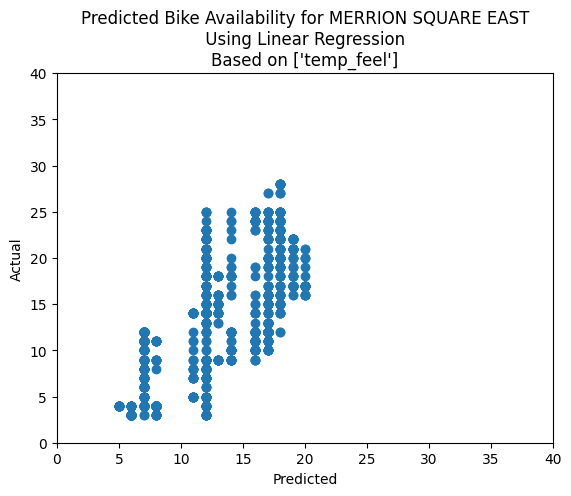

In [115]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Linear Regression \nBased on {feature}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(linreg_predictions, y)

plt.scatter(linreg_predictions, y, color="blue")
plt.title(f'Bike Availability for {stationname}\n Using Linear Regression \n feature is {feature}')
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
#plt.xticks(())
#plt.yticks(())
plt.show()

## Model based on Multiple Regression - multiple features 

In [118]:
y = bikes['bike_available'].loc[bikes['station_select']]
X = bikes[features].loc[bikes['station_select']]

linreg_m = LinearRegression()
linreg_m.fit(X[features], y)

# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg_m.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg_m.coef_)


Intercept: 
 -5.937487395072218
Features: 
 ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel']
Coeficients: 
 [ 0.46061599  0.00893562  1.2828877   0.00957292  0.08908662 -0.18972761]


## Test the model - Multiple Regression

In [123]:
# Predicted scores
linreg_m_predictions = linreg_m.predict(X).round(0)

actual_vs_predicted_m = pd.concat([y, pd.DataFrame(linreg_m_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_m


For MERRION SQUARE EAST: ---


,bike_available,Predicted
1144290,14,13.0
558957,21,20.0
1044561,11,7.0
361011,23,19.0
1553341,10,15.0
...,...,...
394295,3,8.0
1550173,25,18.0
1006080,12,15.0
716756,5,11.0


In [122]:
# Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(linreg_m_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Multiple Regression

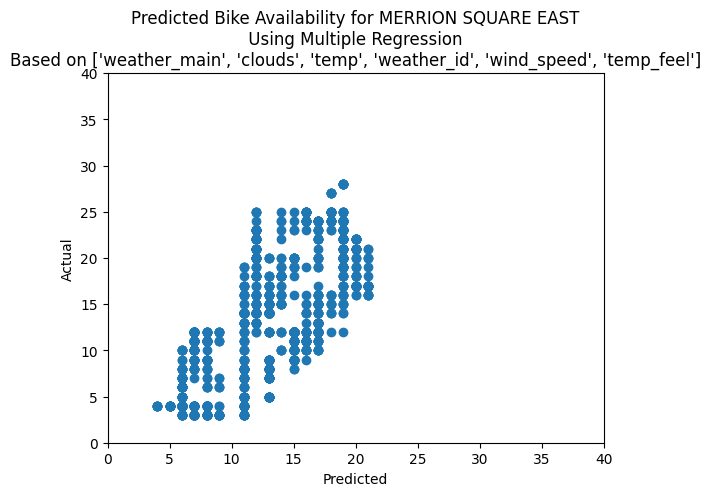

In [128]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Multiple Regression \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(linreg_m_predictions, y)

plt.scatter(linreg_m_predictions, y, color="blue")
#plt.plot(X, treereg_predictions, color="blue", linewidth=3)
plt.title(f'Bike Availability \n Multiple Regression \n features are {features}')
plt.xlabel("Predictions")
plt.ylabel("Actual")
#plt.xticks(())
#plt.yticks(())
plt.show()

## Model based on Decision Tree Regressor 

In [124]:
y = bikes['bike_available'].loc[bikes['station_select']]
X = bikes[features].loc[bikes['station_select']]

#print(len(y))
treereg = DecisionTreeRegressor()
treereg.fit(X, y)

DecisionTreeRegressor()

In [129]:
# Predicted scores for each example. 
treereg_predictions = treereg.predict(X).round(0)

actual_vs_predicted_tree = pd.concat([y, pd.DataFrame(treereg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_tree


For MERRION SQUARE EAST: ---


,bike_available,Predicted
1144290,14,14.0
558957,21,19.0
1044561,11,11.0
361011,23,25.0
1553341,10,10.0
...,...,...
394295,3,3.0
1550173,25,26.0
1006080,12,12.0
716756,5,4.0


In [130]:
# Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(treereg_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Decision Tree Regressor 

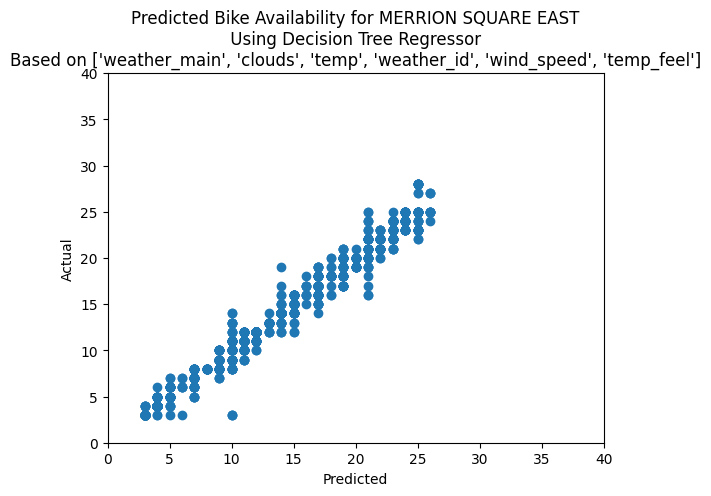

In [131]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Decision Tree Regressor \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(treereg_predictions, y)

plt.scatter(treereg_predictions, y, color="blue")
plt.title(f'Bike Availability \n Decision Tree Regressor \n features are {features}')
plt.xlabel("Predictions")
plt.ylabel("Actual")
#plt.xticks(())
#plt.yticks(())
plt.show()

## Random Forest Model 

In [132]:
y = bikes['bike_available'].loc[bikes['station_select']]
X = bikes[features].loc[bikes['station_select']]

randomforest = RandomForestRegressor()
randomforest.fit(X, y)

randomforest_predictions = randomforest.predict(X).round(0)

actual_vs_predicted_randomforest = pd.concat([y,pd.DataFrame(randomforest_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_randomforest


For MERRION SQUARE EAST: ---


,bike_available,Predicted
1144290,14,14.0
558957,21,19.0
1044561,11,11.0
361011,23,25.0
1553341,10,10.0
...,...,...
394295,3,3.0
1550173,25,25.0
1006080,12,12.0
716756,5,4.0


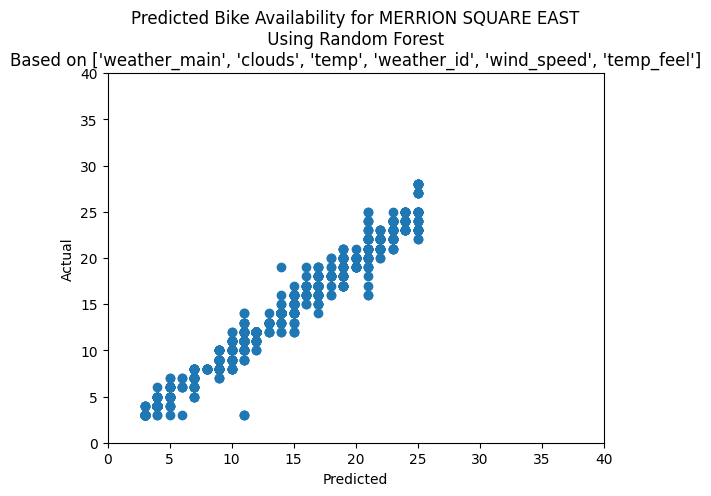

In [137]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Random Forest \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(randomforest_predictions, y)

## Try Lasso Regression 

In [134]:
y = bikes['bike_available'].loc[bikes['station_select']]
X = bikes[features].loc[bikes['station_select']]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [135]:
lassoreg = Lasso(alpha=1)
lassoreg.fit(X, y)

# Print the estimated lasso regression coefficients.
print("\nIntercept: \n", lassoreg.intercept_)
print("Features: \n", features)
print("Coeficients: \n", lassoreg.coef_)


Intercept: 
 12.92756292203806
Features: 
 ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel']
Coeficients: 
 [-0.         -0.          3.33860481  0.15802983  0.          0.        ]


In [136]:
lassoreg_predictions = lassoreg.predict(X).round(0)

actual_vs_predicted_lasso = pd.concat([y, pd.DataFrame(lassoreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_lasso


For MERRION SQUARE EAST: ---


,bike_available,Predicted
1144290,14,12.0
558957,21,19.0
1044561,11,8.0
361011,23,17.0
1553341,10,15.0
...,...,...
394295,3,8.0
1550173,25,17.0
1006080,12,15.0
716756,5,11.0


## Plot Results - Lasso Regression 

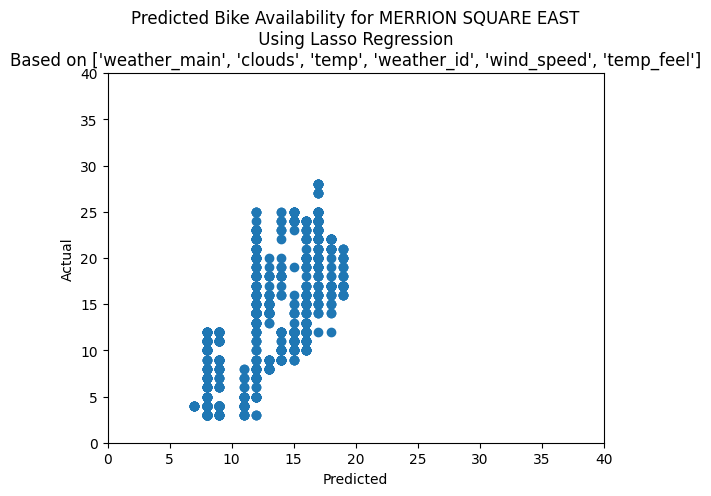

In [139]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Lasso Regression \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(lassoreg_predictions, y)

plt.scatter(lassoreg_predictions, y, color="blue")
plt.title(f'Bike Availability \n Lasso Regression \n features are {features}')
plt.xlabel("Predictions")
plt.ylabel("Actual")
#plt.xticks(())
#plt.yticks(())
plt.show()

## Calculate R2 - Different Models

In [143]:
print(f"\nR2 Calculations for different prediction models for {stationname}")
print("-------------------------------------------------------------------------")

linreg_mse = mean_squared_error(y,linreg_predictions)
linreg_mser = np.sqrt(linreg_mse).round(2)
print(f'Feature is {feature} \n R2 of Linear Regression Model = {linreg_mser} \n')

linreg_m_mse = mean_squared_error(y,linreg_m_predictions)
linreg_m_mser = np.sqrt(linreg_m_mse).round(2)
print(f'Features are {features} \n R2 of Multiple Regression Model = {linreg_m_mser}\n')

treereg_mse = mean_squared_error(y,treereg_predictions)
treereg_mser = np.sqrt(treereg_mse).round(2)
print(f'Features are {features} \n R2 of Decision Regressor Model = {treereg_mser}\n')

randomforest_mse = mean_squared_error(y,randomforest_predictions)
randomforest_mser = np.sqrt(randomforest_mse).round(2)
print(f'Feature is {features} \n R2 of Random Tree Regression Model = {randomforest_mser} \n')

lassoreg_mse = mean_squared_error(y,lassoreg_predictions)
lassoreg_mser = np.sqrt(lassoreg_mse).round(2)
print(f'Features are {features} \n R2 of Lasso Regression Model = {lassoreg_mser}\n')


R2 Calculations for different prediction models for MERRION SQUARE EAST
-------------------------------------------------------------------------
Feature is ['temp_feel'] 
 R2 of Linear Regression Model = 4.61 

Features are ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel'] 
 R2 of Multiple Regression Model = 4.45

Features are ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel'] 
 R2 of Decision Regressor Model = 0.9

Feature is ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel'] 
 R2 of Random Tree Regression Model = 0.9 

Features are ['weather_main', 'clouds', 'temp', 'weather_id', 'wind_speed', 'temp_feel'] 
 R2 of Lasso Regression Model = 4.64



In [147]:
# Serialize model object (in this case Random Forest) into a file on disk using pickle
filename = 'randomforest'+f'{stationid}'+'.pkl'
print(filename)
with open(filename, 'wb') as handle:
    pickle.dump(randomforest, handle, pickle.HIGHEST_PROTOCOL)

randomforest25.pkl
